In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('emi_prediction_dataset.csv')

C:\Users\Nilesh Bahirgaonkar\AppData\Local\Temp\ipykernel_16164\24023947.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('emi_prediction_dataset.csv')


In [3]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

## Checking for inconsistencies 

In [7]:
df['gender'].unique()

array(['Female', 'Male', 'female', 'male', 'M', 'MALE', 'F', 'FEMALE'],
      dtype=object)

In [8]:
df['gender'] = df['gender'].str.lower()

df['gender'] = df['gender'].replace({
    'female':'Female',
    'male':'Male',
    'm':'Male',
    'f':'Female',
})

In [9]:
df['marital_status'].unique()

array(['Married', 'Single'], dtype=object)

In [10]:
df['employment_type'].unique()

array(['Private', 'Government', 'Self-employed'], dtype=object)

In [11]:
df['education'].unique()

array(['Professional', 'Graduate', 'High School', 'Post Graduate', nan],
      dtype=object)

In [12]:
df['company_type'].unique()

array(['Mid-size', 'MNC', 'Startup', 'Large Indian', 'Small'],
      dtype=object)

In [13]:
df['house_type'].unique()

array(['Rented', 'Family', 'Own'], dtype=object)

In [14]:
df['family_size'].unique()

array([3, 2, 4, 5, 1], dtype=int64)

In [15]:
df['dependents'].unique()

array([2, 1, 3, 4, 0], dtype=int64)

In [16]:
df['existing_loans'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df['emi_scenario'].unique()

array(['Personal Loan EMI', 'E-commerce Shopping EMI', 'Education EMI',
       'Vehicle EMI', 'Home Appliances EMI'], dtype=object)

In [18]:
df['age'].unique()

array([38.0, 58.0, 48.0, 32.0, 27.0, 47.0, 37.0, 31.0, 59.0, 49.0, 33.0,
       26.0, 39.0, 57.0, 28.0, '58', '38', '48', '32', '27', '37', '48.0',
       '33', '38.0', '49', '27.0', '31', '39', '47', '59', '32.0', '58.0',
       '57', '26', '28', '58.0.0', '39.0', '26.0', '37.0', '38.0.0',
       '32.0.0'], dtype=object)

In [19]:
df['age'] = df['age'].astype(str)

df['age'] = df['age'].str.replace(r'[^0-9]','',regex=True)

In [20]:
df['age'] = df['age'].str.replace(r'\.+', '.', regex=True)
df['age'] = df['age'].str.replace(r'\.$', '', regex=True) 

In [21]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

## Fixing Data type

|Variables|Data Type|
|-|-|
  |age                   |object 
  |gender                 |object 
  |marital_status         |object 
  |education               |object 
  |monthly_salary         | object 
  |employment_type        | object 
  |years_of_employment    | float64
  |company_type           | object 
  |house_type            |object
  |monthly_rent           | float64
  |family_size            | int64  
  |dependents             | int64  
  |school_fees            | float64
  |college_fees           | float64
  |travel_expenses        | float64
  |groceries_utilities    | float64
  |other_monthly_expenses | float64
  |existing_loans         | object 
  |current_emi_amount     | float64
  |credit_score           | float64
  |bank_balance           | object 
  |emergency_fund         | float64
  |emi_scenario           | object 
  |requested_amount       | float64
  |requested_tenure      |  int64  
  |emi_eligibility        | object 
  |max_monthly_emi        | float64

In [22]:
df = df.convert_dtypes()

In [23]:
# Recheck 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  Int64  
 1   gender                  404800 non-null  string 
 2   marital_status          404800 non-null  string 
 3   education               402396 non-null  string 
 4   monthly_salary          404800 non-null  string 
 5   employment_type         404800 non-null  string 
 6   years_of_employment     404800 non-null  Float64
 7   company_type            404800 non-null  string 
 8   house_type              404800 non-null  string 
 9   monthly_rent            402374 non-null  Int64  
 10  family_size             404800 non-null  Int64  
 11  dependents              404800 non-null  Int64  
 12  school_fees             404800 non-null  Int64  
 13  college_fees            404800 non-null  Int64  
 14  travel_expenses     

In [24]:
df['bank_balance'] = pd.to_numeric(df['bank_balance'], errors='coerce')
df['monthly_salary'] = pd.to_numeric(df['monthly_salary'],errors='coerce')

## Missing Values 

|Variables|Missing values|
|-|-|
|education                |2404|
|monthly_rent             | 2426|
|credit_score             | 2420|
|bank_balance             | 2426|
|emergency_fund           |2351|

#### ***Education***

- As we see there are missing values in education that means the person has not given his/her education.
- now if we filled it with mode, then we actually dont know that whether the person is educated or not. 
- Misingness in education can also mean that the person is uneducated and it may increase the risk to give the emi to the person as that person may have low income.
- We cannot say that missing education means low income, the person with missing education can also be a businessman with skills and high income.
- So instead of mode or any other computation we will fill it with 'Unknown'

In [25]:
df['education'] = df['education'].fillna('Unknown')

#### ***Monthly rent***

- Missing value in monthly rent indicated that either the person is having his own proporty or lives with the family wo owns the property.
- We will be filling the missing values of monthly rent with 0, as it indicats that no rent. 

In [26]:
df['monthly_rent'] = df['monthly_rent'].fillna(0)

#### ***Credit Score***

- As mentioned in the dataset that the credit score is in between 300-850, lets say that if a person's credit score is missing then it means that he peson has no credit history.
- And for missng ones we dont know that they had a history or not.
- will fill the missing with 0.


In [27]:
df['credit_score'] = df['credit_score'].fillna(0)

#### ***Bank Balance***

- Filling with 0

In [28]:
df['bank_balance'] = df['bank_balance'].fillna(0)

#### ***Emergency fund***

- Filing with 0

In [29]:
df['emergency_fund'] = df['emergency_fund'].fillna(0)

In [30]:
# Rececking for missing values 

df.isnull().sum()

age                          0
gender                       0
marital_status               0
education                    0
monthly_salary            1993
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent                 0
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score                 0
bank_balance                 0
emergency_fund               0
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

- So now we have no missing values in the data. 

## Splitting data 

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['emi_eligibility','max_monthly_emi'])
Y_class = df['emi_eligibility']
Y_reg = df['max_monthly_emi']

X_train_class, X_temp_class, y_train_class, y_temp_class = train_test_split(X,Y_class,test_size=0.3,random_state=123)

X_valid_class, X_test_class, y_valid_class, y_test_class = train_test_split(X_temp_class,y_temp_class,test_size = 0.5,random_state=123)

X_train_reg, X_temp_reg, y_train_reg, y_temp_reg = train_test_split(X,Y_reg,test_size=0.3,random_state=123)

X_valid_reg, X_test_reg, y_valid_reg, y_test_reg = train_test_split(X_temp_reg,y_temp_reg,test_size=0.5,random_state=123)

- splitted the data into:
    - for regression:
        - train - 70%
        - test - 15%
        - valid - 15%
  
    - for classification:
         - train - 70%
        - test - 15%
        - valid - 15%

## Feature Engineering 

### Creating Financial ratios 
|Debt-to-income ratio|Expense-to-income ratio|
|-|-|
|current emi amount / monthly salary|expenses / monthly salary|

In [32]:
def add_features(df):
    df['debt_to_income'] = df['current_emi_amount']/df['monthly_salary']

    
    df['expense_to_income'] = (
        df['school_fees'] + df['college_fees'] + df['monthly_rent'] + df['travel_expenses'] + df['groceries_utilities']
        + df['other_monthly_expenses']
    ) /df['monthly_salary']

    
    df['affordability_ratio'] = (
    df['current_emi_amount'] +
    df['monthly_rent'] +
    df['school_fees'] + df['college_fees'] +
    df['groceries_utilities'] + df['travel_expenses'] + df['other_monthly_expenses']
) / df['monthly_salary']
    return df

In [33]:
X_train_class = add_features(X_train_class)
X_valid_class = add_features(X_valid_class)
X_test_class = add_features(X_test_class)

In [34]:
X_train_reg = add_features(X_train_reg)
X_valid_reg = add_features(X_valid_reg)
X_test_reg = add_features(X_test_reg)

In [35]:
for df_split in [X_train_class, X_valid_class, X_test_class, X_train_reg, X_valid_reg, X_test_reg]:
    df_split[['debt_to_income','expense_to_income','affordability_ratio']].fillna(0, inplace=True)

C:\Users\Nilesh Bahirgaonkar\AppData\Local\Temp\ipykernel_16164\3719712889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split[['debt_to_income','expense_to_income','affordability_ratio']].fillna(0, inplace=True)
C:\Users\Nilesh Bahirgaonkar\AppData\Local\Temp\ipykernel_16164\3719712889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split[['debt_to_income','expense_to_income','affordability_ratio']].fillna(0, inplace=True)
C:\Users\Nilesh Bahirgaonkar\AppData\Local\Temp\ipykernel_16164\3719712889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [36]:
def add_risk_features(df):
    df['no_credit_history'] = (df['credit_score'] == 0).astype(int)
    df['emi_burden'] = (df['debt_to_income'] > 0.4).astype('Int64')
    return df

In [37]:
X_train_class = add_risk_features(X_train_class)
X_valid_class = add_risk_features(X_valid_class)
X_test_class  = add_risk_features(X_test_class)

In [38]:
X_train_reg = add_risk_features(X_train_reg)
X_valid_reg = add_risk_features(X_valid_reg)
X_test_reg  = add_risk_features(X_test_reg)

In [39]:
X_train_class.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'debt_to_income',
       'expense_to_income', 'affordability_ratio', 'no_credit_history',
       'emi_burden'],
      dtype='object')

In [40]:
# Dropping Personal Demographics variables as we dont need thm for prediction 

personal_demo_col = ['age','gender','marital_status','education']

# for classification
X_train_class = X_train_class.drop(columns=personal_demo_col)
X_test_class = X_test_class.drop(columns=personal_demo_col)
X_valid_class = X_valid_class.drop(columns=personal_demo_col)

# for regression
X_train_reg = X_train_reg.drop(columns=personal_demo_col)
X_test_reg = X_test_reg.drop(columns=personal_demo_col)
X_valid_reg = X_valid_reg.drop(columns=personal_demo_col)

## Encoding and Scaling

In [41]:
cat_features = ['employment_type', 'company_type', 'house_type', 'existing_loans', 'emi_scenario']

In [42]:
# Classification
X_train_class = pd.get_dummies(X_train_class, columns=cat_features, drop_first=True)
X_valid_class = pd.get_dummies(X_valid_class, columns=cat_features, drop_first=True)
X_test_class  = pd.get_dummies(X_test_class,  columns=cat_features, drop_first=True)

# Regression
X_train_reg = pd.get_dummies(X_train_reg, columns=cat_features, drop_first=True)
X_valid_reg = pd.get_dummies(X_valid_reg, columns=cat_features, drop_first=True)
X_test_reg  = pd.get_dummies(X_test_reg,  columns=cat_features, drop_first=True)

In [43]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['monthly_salary', 'years_of_employment','monthly_rent', 'family_size',
       'dependents', 'school_fees', 'college_fees', 'travel_expenses',
       'groceries_utilities', 'other_monthly_expenses',
       'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund','requested_amount', 'requested_tenure',
       'debt_to_income', 'expense_to_income', 'affordability_ratio',
       'no_credit_history', 'emi_burden']

In [44]:
ss = StandardScaler()

# for classification
X_train_class_scaled = X_train_class.copy()
X_valid_class_scaled = X_valid_class.copy()
X_test_class_scaled  = X_test_class.copy()

X_train_class_scaled[numeric_cols] = ss.fit_transform(X_train_class[numeric_cols])
X_valid_class_scaled[numeric_cols] = ss.transform(X_valid_class[numeric_cols])
X_test_class_scaled[numeric_cols]  = ss.transform(X_test_class[numeric_cols])

In [45]:
# Regression
X_train_reg_scaled = X_train_reg.copy()
X_valid_reg_scaled = X_valid_reg.copy()
X_test_reg_scaled  = X_test_reg.copy()

X_train_reg_scaled[numeric_cols] = ss.fit_transform(X_train_reg[numeric_cols])
X_valid_reg_scaled[numeric_cols] = ss.transform(X_valid_reg[numeric_cols])
X_test_reg_scaled[numeric_cols]  = ss.transform(X_test_reg[numeric_cols])

## EDA

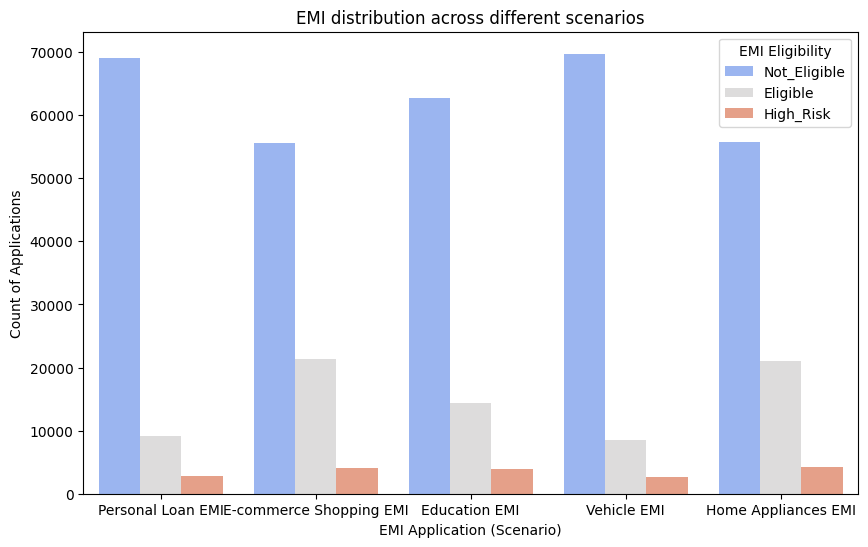

In [46]:
# EMI eligibility distribution across different scenarios

plt.figure(figsize=[10,6])
sns.countplot(data=df,x='emi_scenario',hue='emi_eligibility',palette='coolwarm')
plt.title('EMI distribution across different scenarios')
plt.xlabel('EMI Application (Scenario)')
plt.ylabel('Count of Applications')
plt.legend(title='EMI Eligibility')
plt.show()

In [47]:
# Study correlation between financial variables and loan approval rates

df['emi_eligibility_num'] = df['emi_eligibility'].map({
    'Not_Eligible':0,
    'High_Risk':0,
    'Eligible':1
})

In [48]:
financial_cols = ['monthly_salary', 'years_of_employment', 'monthly_rent', 'family_size',
                  'dependents', 'school_fees', 'college_fees', 'travel_expenses', 
                  'groceries_utilities', 'other_monthly_expenses', 'current_emi_amount',
                  'credit_score', 'bank_balance', 'emergency_fund',
                  'requested_amount', 'requested_tenure']

# Correlation 
corr_with_approval = df[financial_cols + ['emi_eligibility_num']].corr()['emi_eligibility_num'].sort_values(ascending=False)

In [49]:
print(corr_with_approval)

emi_eligibility_num       1.000000
groceries_utilities       0.274604
travel_expenses           0.250644
bank_balance              0.249098
emergency_fund            0.226485
other_monthly_expenses    0.217164
monthly_salary            0.213181
credit_score              0.113651
years_of_employment       0.016755
requested_tenure          0.013721
family_size              -0.036094
dependents               -0.036094
monthly_rent             -0.096307
school_fees              -0.128583
current_emi_amount       -0.144240
college_fees             -0.154153
requested_amount         -0.296344
Name: emi_eligibility_num, dtype: float64


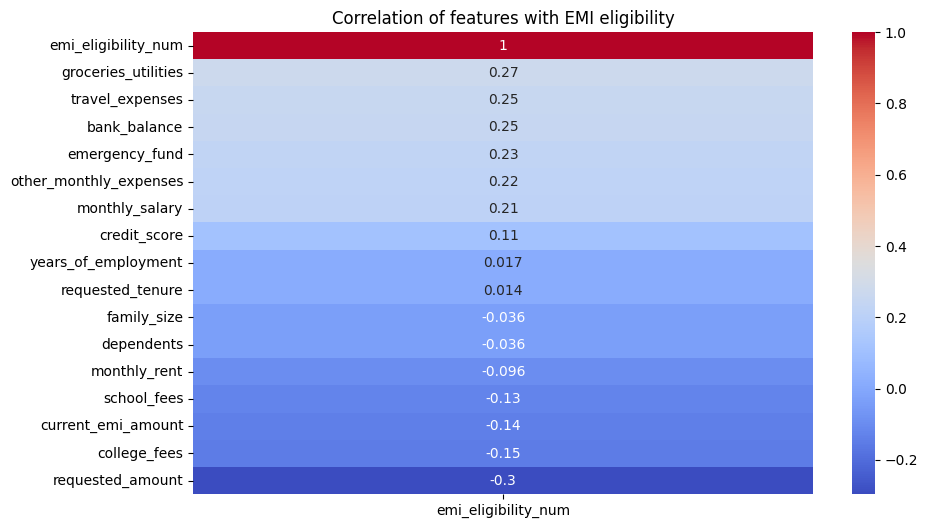

In [50]:
plt.figure(figsize=[10,6])
sns.heatmap(data=corr_with_approval.to_frame(),annot=True,cmap='coolwarm')
plt.title('Correlation of features with EMI eligibility')
plt.show()

In [51]:
corr_between_variables = df[financial_cols + ['emi_eligibility_num']].corr()

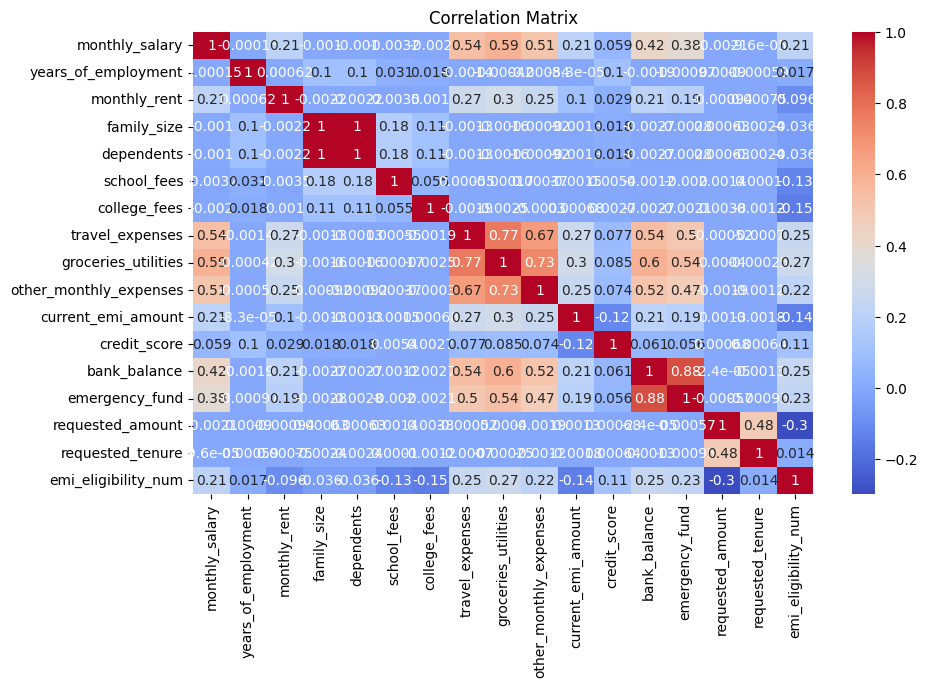

In [52]:
plt.figure(figsize=[10,6])
sns.heatmap(data=corr_between_variables,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

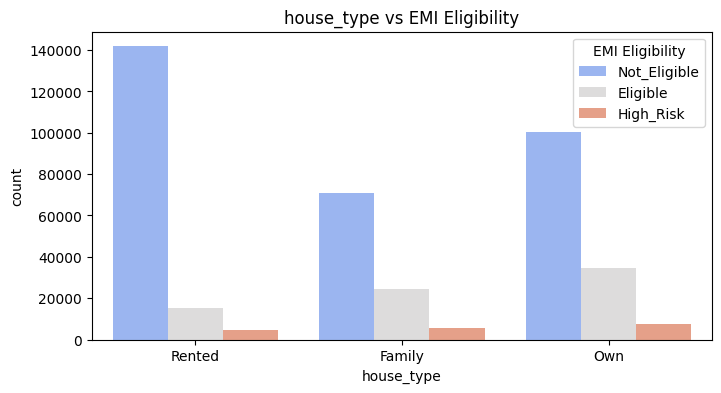

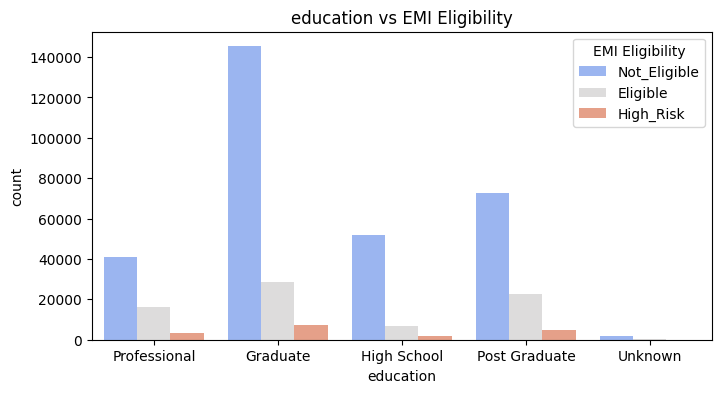

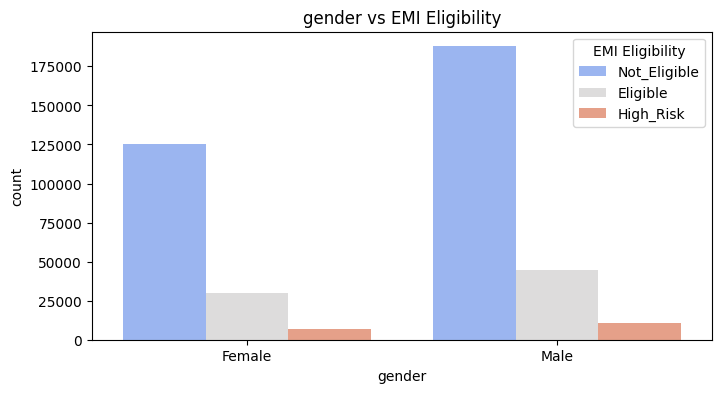

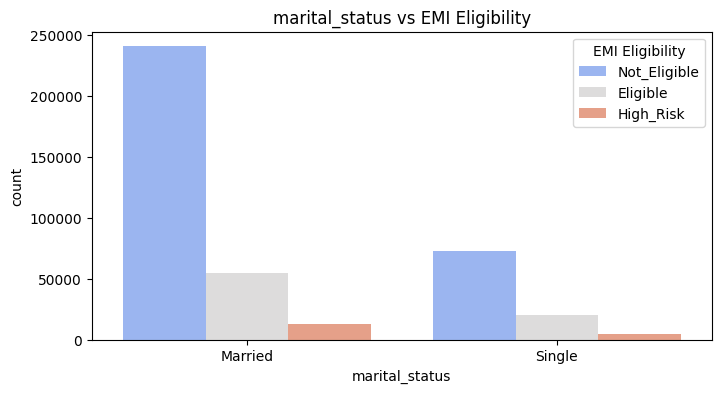

In [53]:
# Investigate demographic patterns and risk factor relationships
demo_cols = ['house_type','education','gender','marital_status']

for col in demo_cols:
    plt.figure(figsize=[8,4])
    sns.countplot(x=col,hue='emi_eligibility',data=df,palette='coolwarm')
    plt.title(f'{col} vs EMI Eligibility')
    plt.legend(title='EMI Eligibility')
    plt.show()

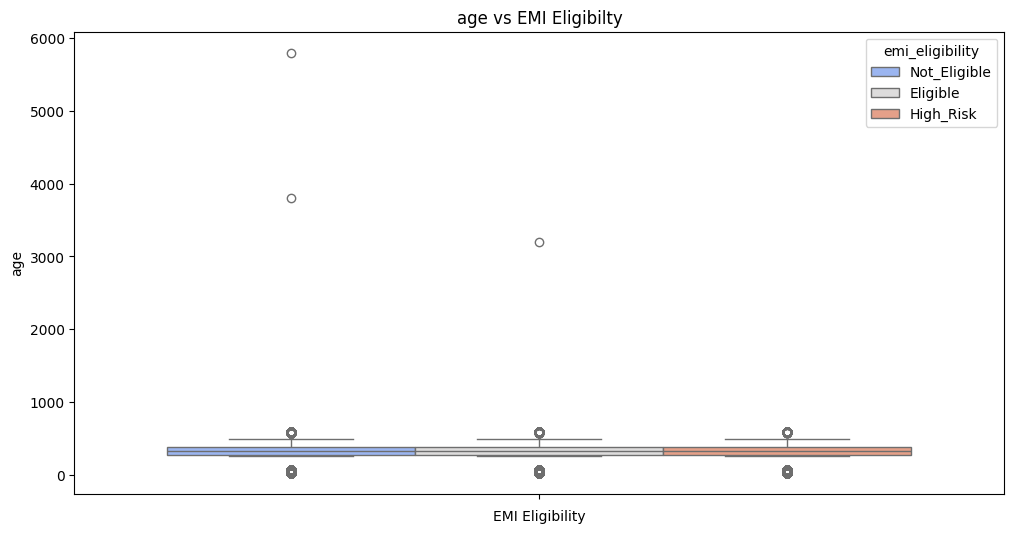

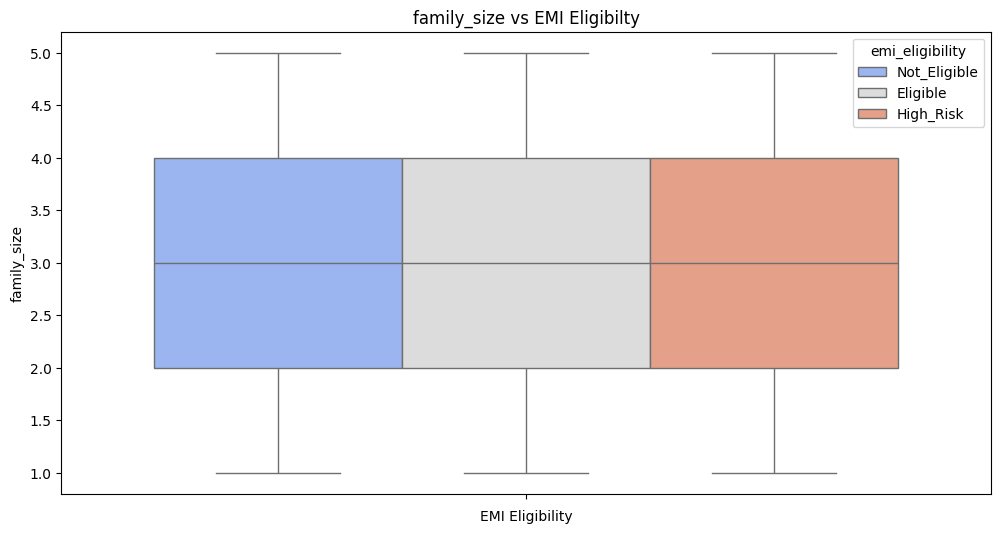

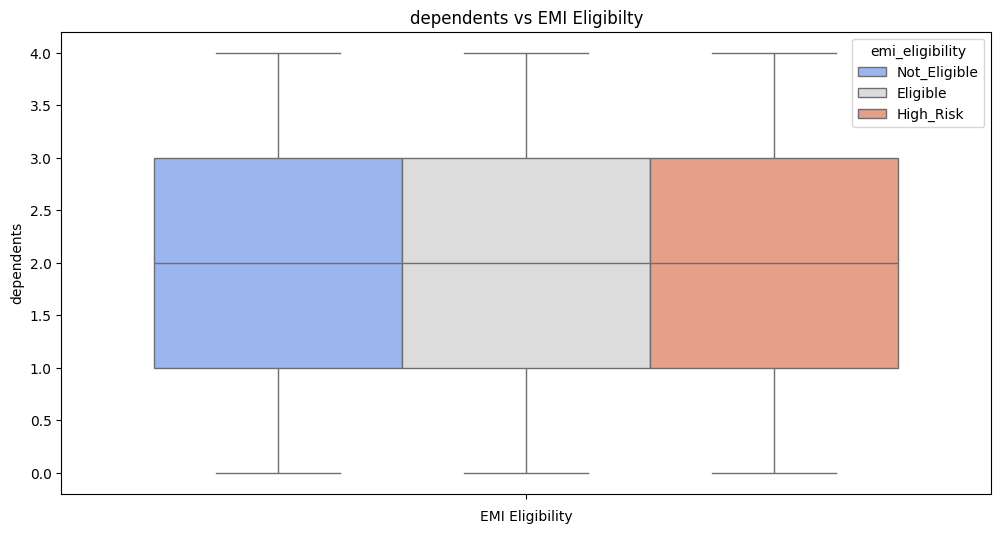

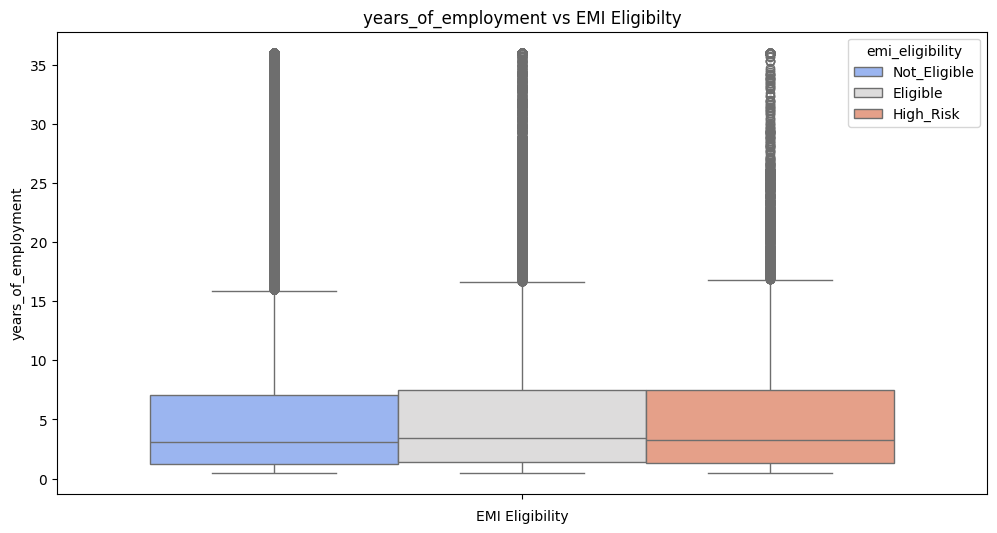

In [54]:
demo_cols_num = ['age','family_size','dependents','years_of_employment']

for col in demo_cols_num:
    plt.figure(figsize=[12,6])
    sns.boxplot(data=df,hue='emi_eligibility',y=col,palette='coolwarm',legend=True)
    plt.title(f'{col} vs EMI Eligibilty')
    plt.xlabel('EMI Eligibility')
    plt.ylabel(col)
    plt.show()

### Regression 

In [55]:
# Regression
X_train_reg.dropna(inplace=True)
X_train_reg_scaled.dropna(inplace=True)
y_train_reg = y_train_reg.loc[X_train_reg.index].dropna()  # Ensure target aligns

X_valid_reg.dropna(inplace=True)
X_valid_reg_scaled.dropna(inplace=True)
y_valid_reg = y_valid_reg.loc[X_valid_reg.index].dropna()

X_test_reg.dropna(inplace=True)
X_test_reg_scaled.dropna(inplace=True)
y_test_reg = y_test_reg.loc[X_test_reg.index].dropna()


In [56]:
# Classification

X_train_class_scaled.dropna(inplace=True)
X_train_class.dropna(inplace=True)
y_train_class = y_train_class.loc[X_train_class.index].dropna()  # Ensure target aligns
 
X_valid_class.dropna(inplace=True)
X_valid_class_scaled.dropna(inplace=True)
y_valid_class = y_valid_class.loc[X_valid_class.index].dropna()

X_test_class.dropna(inplace=True)
X_test_class_scaled.dropna(inplace=True)
y_test_class = y_test_class.loc[X_test_class.index].dropna()


In [64]:
# Converting Scaled arrays into dataframe so that we will be using it into modelling notebook 

In [61]:
X_train_reg_scaled = pd.DataFrame(X_train_reg_scaled, columns=X_train_reg.columns)
X_valid_reg_scaled = pd.DataFrame(X_valid_reg_scaled, columns=X_valid_reg.columns)
X_test_reg_scaled = pd.DataFrame(X_test_reg_scaled, columns=X_test_reg.columns)

### Regression splits 

In [62]:
X_train_reg_scaled.to_csv('X_train_reg_scaled',index=False)
X_train_reg.to_csv('X_train_reg',index=False)

X_test_reg.to_csv('X_test_reg',index=False)
X_test_reg_scaled.to_csv('X_test_reg_scaled',index=False)

X_valid_reg.to_csv('X_valid_reg',index=False)
X_valid_reg_scaled.to_csv('X_valid_reg_scaled',index=False)

In [65]:
y_test_reg.to_csv('y_test_reg',index=False)
y_train_reg.to_csv('y_train_reg',index=False)
y_valid_reg.to_csv('y_valid_reg',index=False)

### Classification splits 

In [63]:
X_train_class_scaled.to_csv('X_train_class_scaled',index=False)
X_train_class.to_csv('X_train_class',index=False)

X_test_class.to_csv('X_test_class',index=False)
X_test_class_scaled.to_csv('X_test_class_scaled',index=False)

X_valid_class.to_csv('X_valid_class',index=False)
X_valid_class_scaled.to_csv('X_valid_class_scaled',index=False)

In [66]:
y_test_class.to_csv('y_test_class',index=False)
y_train_class.to_csv('y_train_class',index=False)
y_valid_class.to_csv('y_valid_class',index=False)